![](images/gmit.PNG)

# GMIT HDip Data Analytics 2019
_______________________________________
## Fundamentals of Data Analysis - Semester 2 - Assignment 

### Thomas Healy G00376351

This notebook contains the submission for Semester 2's Fundamentals of Data Analysis. As per the instructions of the assignment, the assignment is an investigation of the well known tips dataset. The dataset contains data regardng the tipping amounts and other observations of a fictictious restaurant.

The assignment will be broken down in to 4 distinct sections.

1. __Description__ 

This section outlines the shape, summary statistics and other analytical descriptions of the data.

2. __Regression__

This section will evaluate if there a relationship between the total bill annd tip amount and if there is a relationship the strength of the relationship.

3. __Analyse__

The final section will draw on the relationship between other variables and discuss the findings. 

4. __ML Model__

I'm going to add ML model to predict out some output from the variable in the set e.g. the gender of the tipper based on variables

### 1. Description

In this section, we will describe the shape, structure and type of data. We will then use plots to 

In [2]:
#First, let's import the packages we will need.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

#As we are plotting on white space, the use of a darkgrid background will add some contrast
sns.set(style="darkgrid")

#We read in the csv file and assign it to the var "df"
df = pd.read_csv('tips.csv')

In [3]:
#Let's print the entire set to evaluate the overall feel lof it. So we can see we have 7 
#columns with 244 rows. We have 3 numerical columns and 4 columns with categorical data.
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [5]:
#Bit redundant after the above but we can print the names of the columns
print(df.columns)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [6]:
#Number of Rows and Columns
print(df.shape)

(244, 7)


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB
None


In [8]:
#Let's take a look at the integrity of the data - any missing values. 
df['total_bill'].isnull()
df['tip'].isnull()
df['sex'].isnull()
df['smoker'].isnull()
#df['day'].isnull()
df['time'].isnull()
df['size'].isnull()

print ("Here is the number of missing values in the set:\n",df.isnull().sum())

Here is the number of missing values in the set:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


Looks like we have good set (:-)) with no missing values.

In [9]:
df.dropna()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [10]:
#This prints the missing values in our data set. we have none :-)
missing_data = df[df.isnull().any(axis=1)]
missing_data

,total_bill,tip,sex,smoker,day,time,size


In [11]:
#Another check for missing data, a True value is returned for a missing value 
missing_data2 = df[df.isna().any(axis=1)]
missing_data2

,total_bill,tip,sex,smoker,day,time,size


We have a great dataset with n missing values.

In [12]:
#We are going to add another column to our datset. This column is the percentage of tip to total bill. This may come in 
#handy later. 
df['tip_pct'] = df['tip'] / df['total_bill']

In [13]:
#We re-run the command to ensure the extra is now showing
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
tip_pct       244 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 15.3+ KB
None


In [14]:
# This is taken from page 304,Data Science from Scratch.
grouped = df.groupby(['day', 'smoker'])

In [15]:
grouped_pct = grouped['tip_pct']

In [16]:
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [17]:
#I like the following code:
functions = ['count', 'mean', 'max']

In [18]:
result = grouped['tip_pct', 'total_bill'].agg(functions)

In [19]:
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [20]:
# The df dataset contains floats, objects(strings) and intergers
print(df.dtypes)

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
tip_pct       float64
dtype: object


In [21]:
print(df.describe)

<bound method NDFrame.describe of      total_bill   tip     sex smoker   day    time  size   tip_pct
0         16.99  1.01  Female     No   Sun  Dinner     2  0.059447
1         10.34  1.66    Male     No   Sun  Dinner     3  0.160542
2         21.01  3.50    Male     No   Sun  Dinner     3  0.166587
3         23.68  3.31    Male     No   Sun  Dinner     2  0.139780
4         24.59  3.61  Female     No   Sun  Dinner     4  0.146808
5         25.29  4.71    Male     No   Sun  Dinner     4  0.186240
6          8.77  2.00    Male     No   Sun  Dinner     2  0.228050
7         26.88  3.12    Male     No   Sun  Dinner     4  0.116071
8         15.04  1.96    Male     No   Sun  Dinner     2  0.130319
9         14.78  3.23    Male     No   Sun  Dinner     2  0.218539
10        10.27  1.71    Male     No   Sun  Dinner     2  0.166504
11        35.26  5.00  Female     No   Sun  Dinner     4  0.141804
12        15.42  1.57    Male     No   Sun  Dinner     2  0.101816
13        18.43  3.00    Mal

In [22]:
#Let's check that worked
print(df.columns)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'tip_pct'], dtype='object')


In [23]:
#Printing to the screen the percentage value of total bill / tip, the first 10 only.
df.sort_values(by=['total_bill'],ascending=False).head(10)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
170,50.81,10.00,Male,Yes,Sat,Dinner,3,0.196812
212,48.33,9.00,Male,No,Sat,Dinner,4,0.186220
59,48.27,6.73,Male,No,Sat,Dinner,4,0.139424
156,48.17,5.00,Male,No,Sun,Dinner,6,0.103799
182,45.35,3.50,Male,Yes,Sun,Dinner,3,0.077178
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433
197,43.11,5.00,Female,Yes,Thur,Lunch,4,0.115982
142,41.19,5.00,Male,No,Thur,Lunch,5,0.121389
184,40.55,3.00,Male,Yes,Sun,Dinner,2,0.073983
95,40.17,4.73,Male,Yes,Fri,Dinner,4,0.117750


In [24]:
df.sort_values(by=['tip_pct'],ascending=False).head(10)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
149,7.51,2.00,Male,No,Thur,Lunch,2,0.266312
93,16.32,4.30,Female,Yes,Fri,Dinner,2,0.263480
221,13.42,3.48,Female,Yes,Fri,Lunch,2,0.259314
51,10.29,2.60,Female,No,Sun,Dinner,2,0.252672


In [25]:
# Shows the non numeric counts, we have 244 
print(df.count())

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
tip_pct       244
dtype: int64


### df.describe()

In [26]:
#Shows the top 5 rows by tip value. The Sort and Groups are some of the most inportant in DS.
df.sort_values(by=['tip'],ascending=False).head(5)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
170,50.81,10.00,Male,Yes,Sat,Dinner,3,0.196812
212,48.33,9.00,Male,No,Sat,Dinner,4,0.186220
23,39.42,7.58,Male,No,Sat,Dinner,4,0.192288
59,48.27,6.73,Male,No,Sat,Dinner,4,0.139424
141,34.30,6.70,Male,No,Thur,Lunch,6,0.195335


In [27]:
#Here we are sorting on the size of the total bill. Row 170 had the highest bill amount.
df.sort_values(by=['total_bill'],ascending=False).head(5)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
170,50.81,10.00,Male,Yes,Sat,Dinner,3,0.196812
212,48.33,9.00,Male,No,Sat,Dinner,4,0.186220
59,48.27,6.73,Male,No,Sat,Dinner,4,0.139424
156,48.17,5.00,Male,No,Sun,Dinner,6,0.103799
182,45.35,3.50,Male,Yes,Sun,Dinner,3,0.077178


In [28]:
#Here we are sorting on the tip pct column we added. Row 172 had the highest tip pct. (Happened on a Sunday, maybe they 
#were getting rid of change from night before 71 % tip :-)) 
df.sort_values(by=['tip_pct'],ascending=False).head(5)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535


In [29]:
#Same again except we are sorting from the bottom up. 3%... ouch
df.sort_values(by=['tip_pct'],ascending=False).tail(5)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433
237,32.83,1.17,Male,Yes,Sat,Dinner,2,0.035638


In [30]:
df.sort_values(by=['total_bill'],ascending=False).head(5)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
170,50.81,10.00,Male,Yes,Sat,Dinner,3,0.196812
212,48.33,9.00,Male,No,Sat,Dinner,4,0.186220
59,48.27,6.73,Male,No,Sat,Dinner,4,0.139424
156,48.17,5.00,Male,No,Sun,Dinner,6,0.103799
182,45.35,3.50,Male,Yes,Sun,Dinner,3,0.077178


In [31]:
#Next we describe the numerical values in the set 
#(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
print(df.describe(include='all'))

        total_bill         tip   sex smoker  day    time        size  \
count   244.000000  244.000000   244    244  244     244  244.000000   
unique         NaN         NaN     2      2    4       2         NaN   
top            NaN         NaN  Male     No  Sat  Dinner         NaN   
freq           NaN         NaN   157    151   87     176         NaN   
mean     19.785943    2.998279   NaN    NaN  NaN     NaN    2.569672   
std       8.902412    1.383638   NaN    NaN  NaN     NaN    0.951100   
min       3.070000    1.000000   NaN    NaN  NaN     NaN    1.000000   
25%      13.347500    2.000000   NaN    NaN  NaN     NaN    2.000000   
50%      17.795000    2.900000   NaN    NaN  NaN     NaN    2.000000   
75%      24.127500    3.562500   NaN    NaN  NaN     NaN    3.000000   
max      50.810000   10.000000   NaN    NaN  NaN     NaN    6.000000   

           tip_pct  
count   244.000000  
unique         NaN  
top            NaN  
freq           NaN  
mean      0.160803  
std      

In [32]:
df.groupby(['sex']).mean()

,total_bill,tip,size,tip_pct
sex,,,,
Female,18.056897,2.833448,2.459770,0.166491
Male,20.744076,3.089618,2.630573,0.157651


In [33]:
#Here we are selecting the first 4 rows, indexed from 0 not 1
df[0:4]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780


In [34]:
#Here we are selected just the first row
df.loc[0]

total_bill        16.99
tip                1.01
sex              Female
smoker               No
day                 Sun
time             Dinner
size                  2
tip_pct       0.0594467
Name: 0, dtype: object

In [35]:
#Selecting all rows where the gender is Female
y = df.loc[df.loc[:,'sex'] == 'Female']
print(y.count())

total_bill    87
tip           87
sex           87
smoker        87
day           87
time          87
size          87
tip_pct       87
dtype: int64


In [36]:
#Selecting all rows where the gender is male
x = df.loc[df.loc[:,'sex'] == 'Male']
print(x.count())

total_bill    157
tip           157
sex           157
smoker        157
day           157
time          157
size          157
tip_pct       157
dtype: int64


In [37]:
x = df.loc[df.loc[:,'smoker'] == 'Yes']
print(x.count())

total_bill    93
tip           93
sex           93
smoker        93
day           93
time          93
size          93
tip_pct       93
dtype: int64


In [38]:
x = df.loc[df.loc[:,'smoker'] == 'No']
print(x.count())

total_bill    151
tip           151
sex           151
smoker        151
day           151
time          151
size          151
tip_pct       151
dtype: int64


From the above outputs we can make the following observations about our dataset:
* We have a clean data set with no missing values.
* We have a 244 row data set with 7 columns. We added an 8th column named "tip_pct".
* The columns we have are :"total_bill" ,"tip",	"sex", "smoker", "day", "time", "size" and we added "tip_pct".
* Top tip  percentage was 71% of the bill and 3% was the lowest.
* We have a 157 males and 87 females.
* We have 93 smokers and 151 non smokers.
* Our mean (pardon the pun) was 16% of the total bill.



We will now add some plot to understand the set visually. I had added as many graphs as I could find but in light of the lectures, I will focus on scatterplots, histograms, box plots and maybe one or other forms of graphs

## Plotting
In this section, I will be using plots from the seaborn tutorial page. I am changing around layouts (swapping x and y), colors (using sex or time as hues) and changing the orientation to add some variation in the plots but the Seaborn Turtorial is the touchstone for this part.

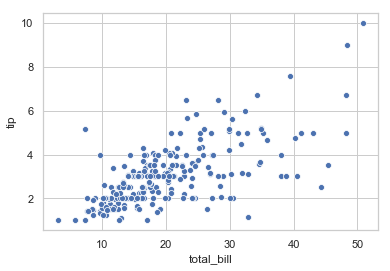

In [77]:
sns.scatterplot(data=df, x='total_bill', y='tip')

From the above plot, we can see that the majority of our observations are clustered around 10 - 30 dollar bill amount. The majority of our tip amounts are clustered around the 1 - maybe 5 dollar amounts. We have a few outliers here in the top right hand side of the plot. We should re-plot to investigate. 

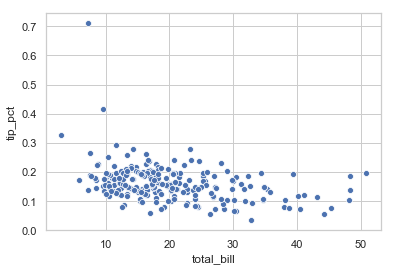

In [87]:
sns.scatterplot(data=df, x='total_bill', y='tip_pct')

Interestingly, when we re-plot we can see the 50ish dollar total bill observation is in line with our other obvservations regarding tip percentage. We can now see our new outliers, the observations at .4ish and .7 are well outside our clustered data. 

We can code up a function to do this based on what we have observed and then to handle the outlier.

In [89]:
df[df['tip_pct'] > .4]

,total_bill,tip,sex,smoker,size,tip_pct,Sat,Sun,Thur,Lunch
172,7.25,5.15,0,1,2,0.710345,0,1,0,0
178,9.60,4.00,1,1,2,0.416667,0,1,0,0


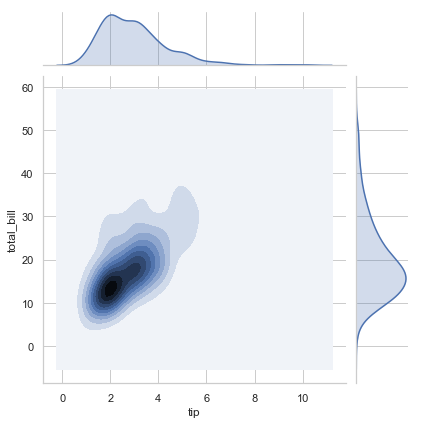

In [86]:
sns.jointplot(x="tip", y="total_bill", data=df, kind="kde");

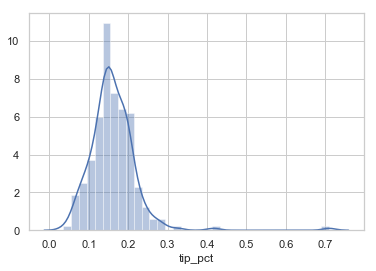

In [75]:
x = sns.distplot(df['tip_pct'], kde=True)

plt.show()

C:\Users\Teamwork\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


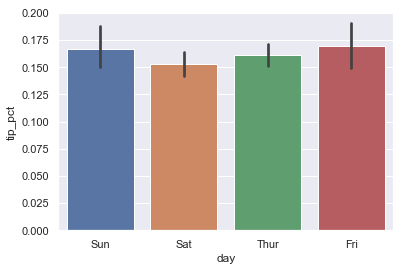

In [39]:
#Using Seaborn to plot 
sns.barplot(x='day', y ='tip_pct', data=df, orient="v")

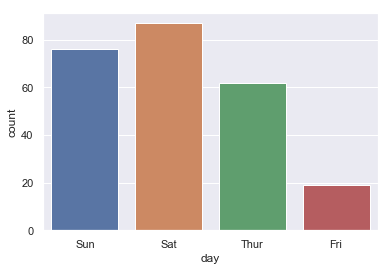

In [40]:
sns.countplot(x='day',data=df, orient="v")

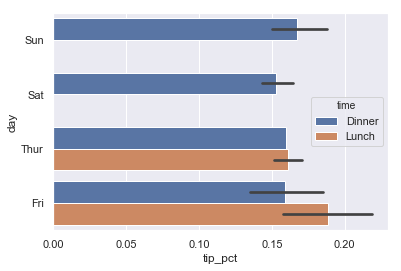

In [41]:
sns.barplot(x='tip_pct', y ='day' , hue='time', data=df, orient='h')


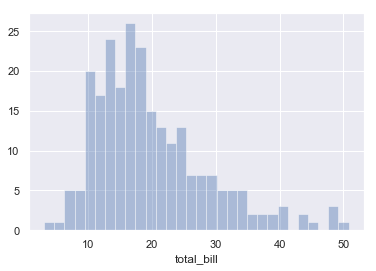

In [42]:
sns.distplot(df['total_bill'], kde=False, bins=30)
plt.show()

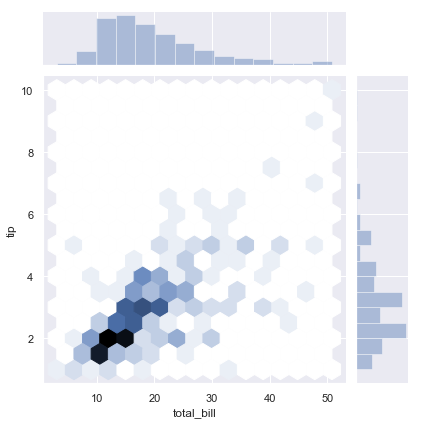

In [44]:
sns.jointplot(x= 'total_bill', y = 'tip', data=df, kind='hex')
plt.show()

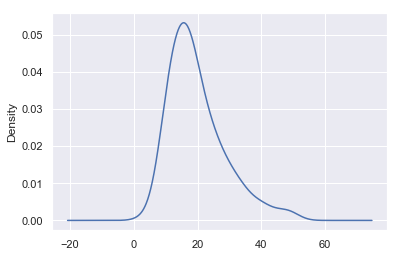

In [45]:
df['total_bill'].plot.density()

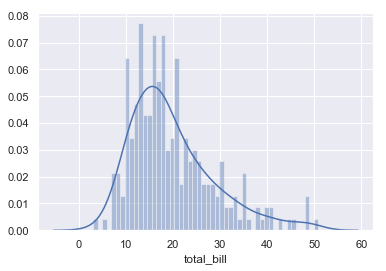

In [46]:
sns.distplot(df['total_bill'], kde=True, bins=50)

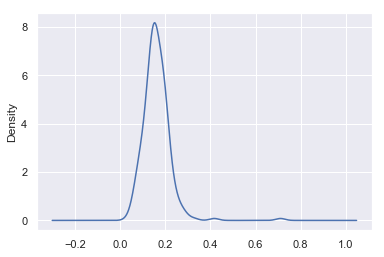

In [47]:
#Here we can see a plot of the frequency of the values in 'tip_pct'. If we remeber that the mean of the tip pct was .16 
#approx from our descripbe function earlier this agrees with what we are seing here. We also see two smalll bump around
#the .4 and .7 mark. We should investigate.

df['tip_pct'].plot.density()

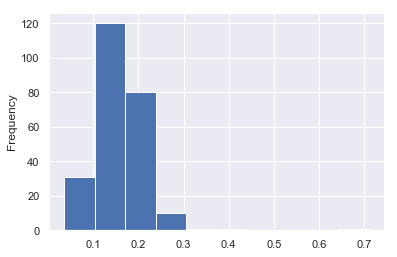

In [48]:
#We can investugate by using a histogram. We chnage the level of granularity by adjust the bins. A bin number of 10 gives us the
#general shape but the nuances at .4 and .7 have been lost. Let's try again with more detail.
df['tip_pct'].plot.hist(bins=10)

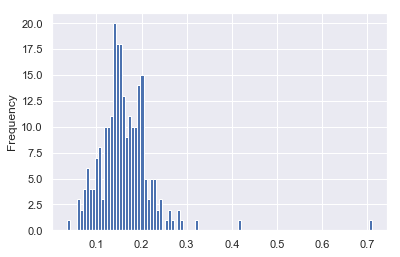

In [49]:
#Here we can see the outliers quite easily because of the granularity we have introduced.
df['tip_pct'].plot.hist(bins=100)

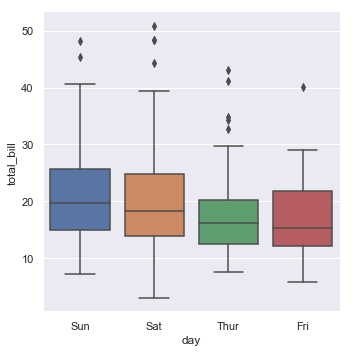

In [50]:
#This is taken verbatim from the Seaborn Tutorial
sns.catplot(x="day", y="total_bill", kind="box", data=df);


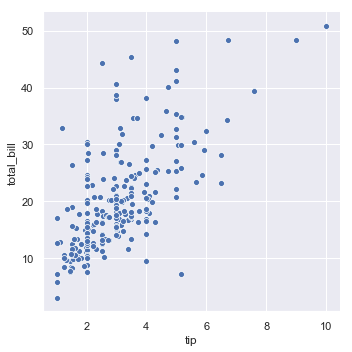

In [51]:
#This is the main plot for the regression part. I swapped the x and y to change it from the tutorial.
sns.relplot(x="tip", y="total_bill", data=df);

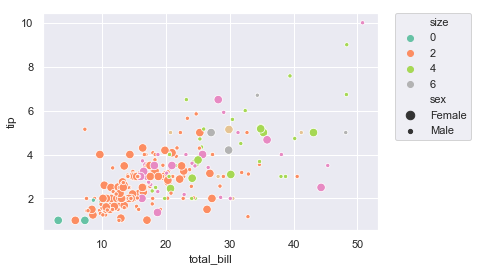

In [52]:
sns.scatterplot(data=df, x="total_bill", y="tip", hue="size", size="sex", palette="Set2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

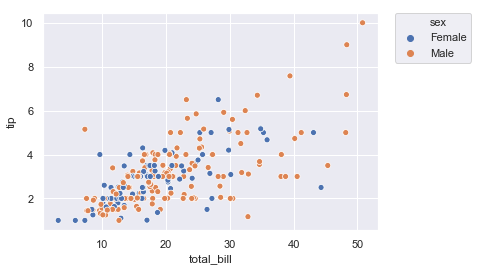

In [53]:
sns.scatterplot(data=df, x='total_bill', y='tip', hue='sex')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

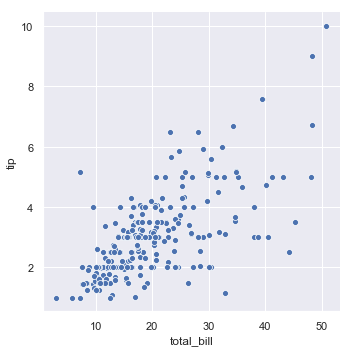

In [54]:
sns.relplot(x="total_bill", y="tip", data=df);

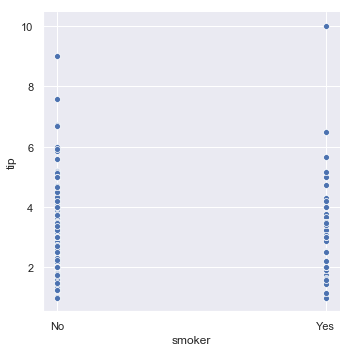

In [55]:
sns.relplot(x="smoker", y="tip", data=df);

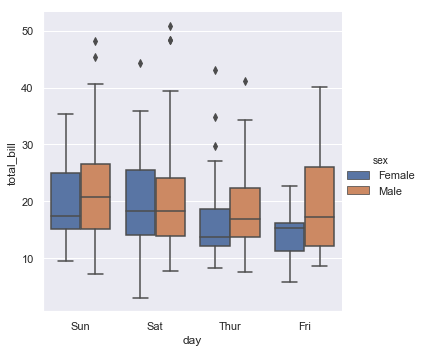

In [56]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="box", data=df);

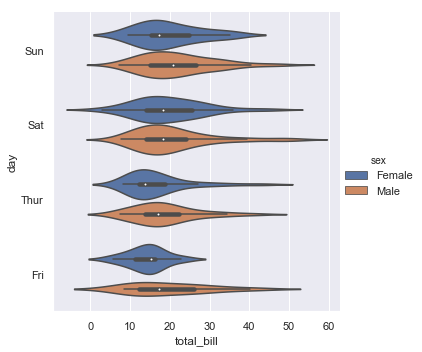

In [57]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", data=df);

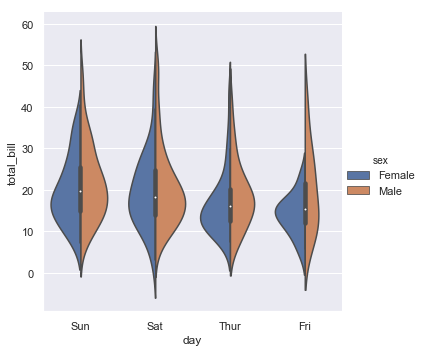

In [58]:
#Added the 
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=df);

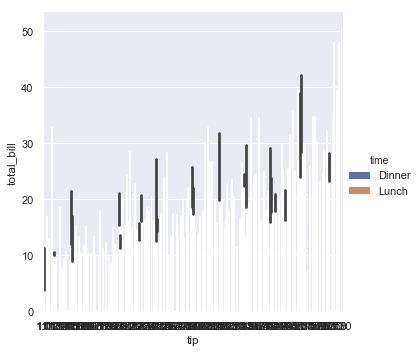

In [59]:
sns.catplot(x="tip", y="total_bill", hue="time", kind="bar", data=df);

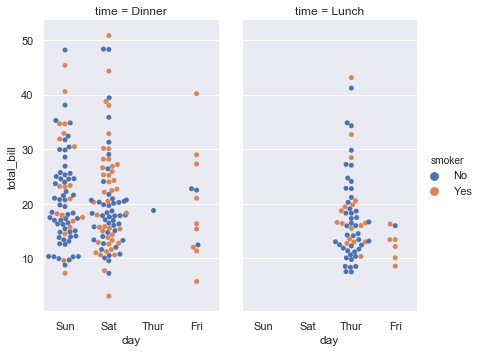

In [60]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=df);

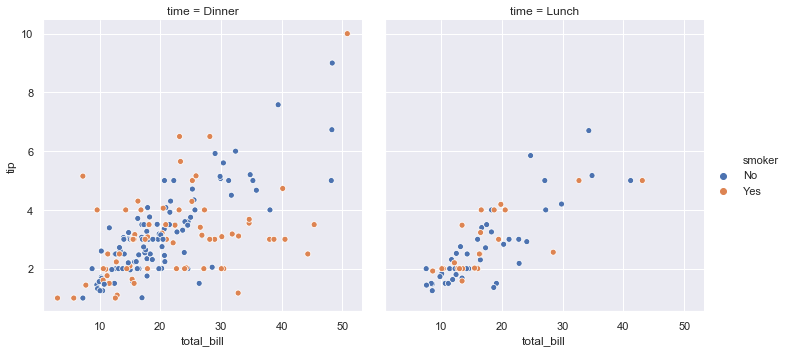

In [61]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=df);

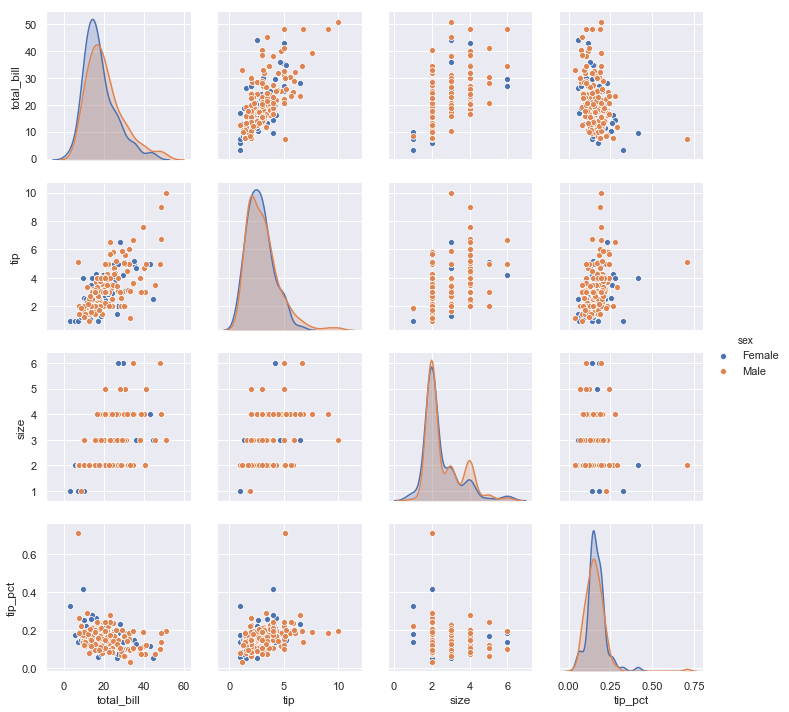

In [62]:
sns.pairplot(df, hue='sex')

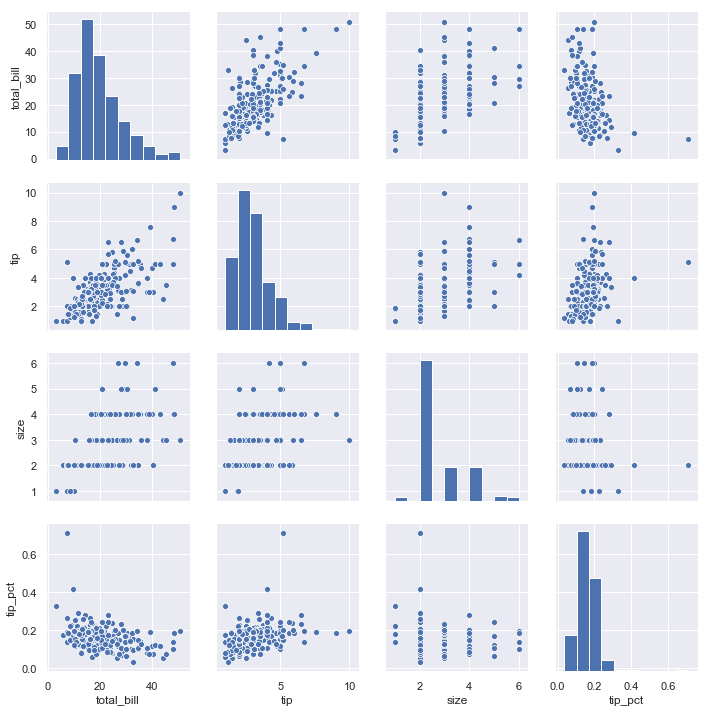

In [63]:
sns.pairplot(df)

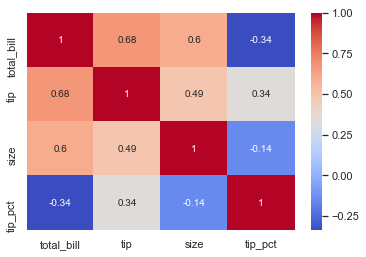

In [64]:
df.corr()

sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

### 2. Regression

C:\Users\Teamwork\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


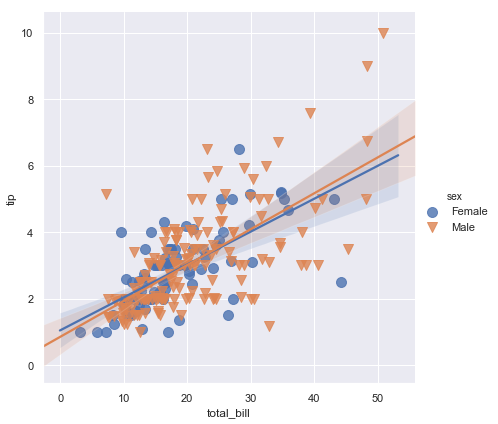

In [65]:
sns.lmplot(x='total_bill',y='tip', data=df,hue='sex',
           markers=['o','v'],scatter_kws={'s':100},size=6)

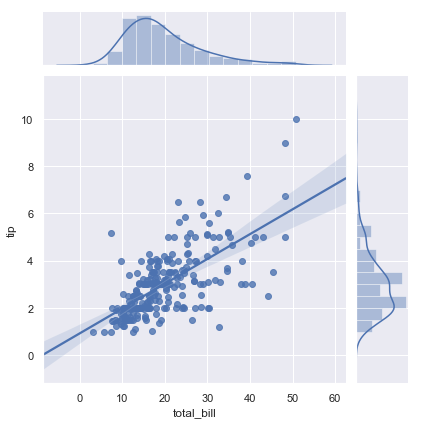

In [66]:
sns.jointplot(x= 'total_bill', y = 'tip', data=df, kind='regression')
plt.show()

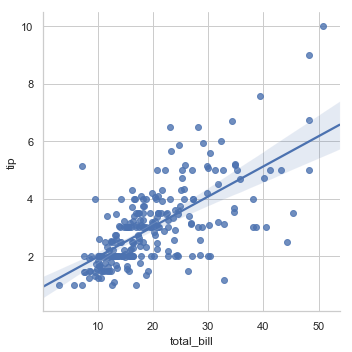

In [85]:
sns.lmplot(x="total_bill", y="tip", data=df, x_jitter=.05);

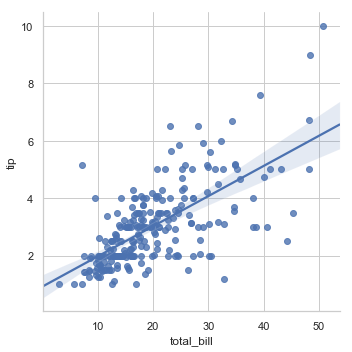

In [67]:
sns.set_style('whitegrid') 
sns.lmplot(x ='total_bill', y ='tip', data = df)

C:\Users\Teamwork\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(10.04999999999999, 0.5, 'Tip Amount')

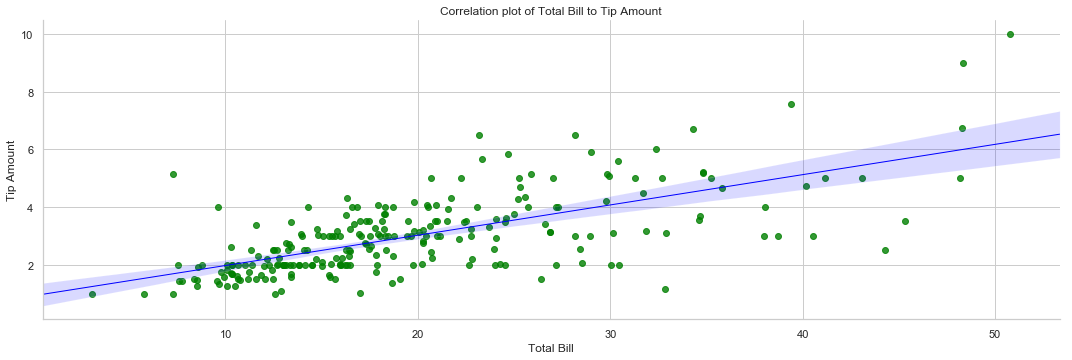

In [68]:
#This is adapted from Susan Li Python for DA (https://github.com/susanli2016/Data-Analysis-with-Python/blob/master/Baseball%2C%20Moneyball.ipynb)
#Line 288
sns.lmplot('total_bill', "tip", df, scatter_kws={'marker':'^', 'color': 'green'}, 
           line_kws={'linewidth':1,'color':'blue'}, size = 5, aspect = 3)

plt.title('Correlation plot of Total Bill to Tip Amount')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')

### 3. Analysis

### 4. Model -
https://devarea.com/python-machine-learning-example-linear-regression/#.XchdbFf7SUk

In [69]:
df.replace({ 'sex': {'Male':0 , 'Female':1} , 'smoker' : {'No': 0 , 'Yes': 1}} ,inplace=True)
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,1,0,Sun,Dinner,2,0.059447
1,10.34,1.66,0,0,Sun,Dinner,3,0.160542
2,21.01,3.50,0,0,Sun,Dinner,3,0.166587
3,23.68,3.31,0,0,Sun,Dinner,2,0.139780
4,24.59,3.61,1,0,Sun,Dinner,4,0.146808


In [70]:
days=pd.get_dummies(df['day'])
days.sample(5)

,Fri,Sat,Sun,Thur
65,0,1,0,0
114,0,0,1,0
33,0,1,0,0
233,0,1,0,0
227,0,1,0,0


In [71]:
days=pd.get_dummies(df['day'],drop_first=True)
days.sample(6)

,Sat,Sun,Thur
41,0,1,0
205,0,0,1
115,0,1,0
24,1,0,0
87,0,0,1
217,1,0,0


In [72]:
days=pd.get_dummies(df['day'],drop_first=True)
df = pd.concat([df,days],axis=1)
times=pd.get_dummies(df['time'],drop_first=True)
df = pd.concat([df,times],axis=1)
df.drop(['day','time'],inplace=True,axis=1)
df.head()

,total_bill,tip,sex,smoker,size,tip_pct,Sat,Sun,Thur,Lunch
0,16.99,1.01,1,0,2,0.059447,0,1,0,0
1,10.34,1.66,0,0,3,0.160542,0,1,0,0
2,21.01,3.50,0,0,3,0.166587,0,1,0,0
3,23.68,3.31,0,0,2,0.139780,0,1,0,0
4,24.59,3.61,1,0,4,0.146808,0,1,0,0


In [73]:
X = df[['sex','smoker','size','Fri','Sat','Sun','Dinner']]
Y = df[['tip']]

KeyError: "['Fri' 'Dinner'] not in index"

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test , y_train , y_test = train_test_split(X,Y,test_size=0.25,random_state=26)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
predictions=model.predict(X_test)

In [ ]:
sns.distplot(y_test-predictions)

# References

Albon, C., __Machine Learning with Python Cookbook__

Burkov, A., __The Hundred-Page Machine Learning Book__

Hastie, T. Tibshirani, R. Friedman,J . __The Elements of Statistical Learning:Data Mining, Inference, and Prediction__

Grus, J., __Data Science From Scratch, First Principles with Python__

Kinney, W., __Python for Data Analysis__

James, J., Witten, D., Hastie, T., Tibshirani R., __An Introduction to Statistical Learning__

Dell EMC Education Services, __Data Science and Big Data Analytics: Discovering, Analyzing, Visualizing and Presenting Data__


# Websites

https://grindsquare.co.za/python-data-visualisation-using-seaborn/

https://seaborn.pydata.org/index.html


